In [185]:
import numpy as np;
import cv2;
import matplotlib.pyplot as plt;

1. Distance between PDFs: In this question you will explore the other “distances” between PDFs dis-
cussed in class. To verify the implementation of these distances, use the normalized histogram of the
stereo image pair (left.png, right.png) used in the previous assignment.

(a) Cross Entropy (CE): The cross entropy between two PDFs (PMFs) p and q is given by: H(p, q) =
H(p) + D(p||q) where H(p) is the entropy of p and D(p||q) is the KL divergence between p and
q. Write a function that accepts two PDFs (PMFs) p, q and outputs the CE between them.

In [189]:
# Code For H(p,q)
#H(p,q)=-(summation)p(i)log(qi)
# here p is true distribution and q is predicted distribution
# and H(p,q) is distance to encode p from q
def Cross_Entropy(p,q):
    # if(len(p)!=len(q)):
    #     raise ValueError("Dimension of both p and q must be equal.")
    # print(f'{len(p)}');
    # print(f'{len(q)}');
    if(np.sum(p)!=1 or np.sum(q)!=1):
        raise ValueError("PMF must sum to 1.")
    p=p[p>0]
    q=q[q>0]
    # print(f'{len(p)}');
    # print(f'{len(q)}');
    return -np.sum(p*np.log2(q));

In [191]:
#Entropy of true distribution
def Entropy(p):
    # if(np.any(p)<=0):
    #     raise ValueError("PMF must not contain negative-value.")
    if(np.sum(p)!=1):
        raise ValueError("PMF must sum to 1.")
    p=p[p>0];    
    return -np.sum(p*np.log2(p));

In [193]:
#Relative Entropy(KL Divergence)
#Dkl(p||q)=-(summation)(p(i)*log(p(i)/q(i)))
#Measues how much q diverges from p
def KL_Divergence(p,q):
    # if(len(p)!=len(q)):
    #     raise ValueError("Dimension of both p and q must be equal.")
    
    if(np.sum(p)!=1 or np.sum(q)!=1):
        raise ValueError("PMF must sum to 1.")
    p=p[p>0]
    q=q[q>0]    
    return np.sum(p*np.log2(p/q));

i. Verify your function using the stereo image normalized histogram pair. (1)

In [196]:
def normalized_histogram(image_path):
    # image=cv2.imread('image_path',cv2.IMREAD_GRAYSCALE);
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_array=np.array(image);
    # print(image_array);
    histogram,_=np.histogram(image_array,bins=256,range=(0,256));
    image_size=image_array.size;
    # print(f'{image_size}')
    norm_histogram=histogram / image_size;
    return norm_histogram;

In [198]:
#Now Going step-by-step
#Step1 Taking Input of image

right_IP='./right.png'
left_IP='./left.png'

#let us take left as true
#so p=left and q=right(perdicted)
p=normalized_histogram(left_IP);
q=normalized_histogram(right_IP);
# print(f'{hist1}')

#H(p,q)
CE=Cross_Entropy(p,q);

# #H(p)
entropy=Entropy(hist1);

# #D(p||q)
KL=KL_Divergence(p,q);

print(f'H(p,q)={CE}')
print(f'H(p)={entropy}');
print(f'K(p||q)={KL}');

print(f'H(p)+(D(p||q))={KL+entropy}')
print(f'H(p)+(D(p||q)-H(p,q))={KL+entropy-CE:.8f}')
print('H(p,q)=H(p)+D(p||q)')
print('Hence verified')


H(p,q)=7.273398119987325
H(p)=7.258294104749939
K(p||q)=0.015104015237387056
H(p)+(D(p||q))=7.273398119987326
H(p)+(D(p||q)-H(p,q))=0.00000000
H(p,q)=H(p)+D(p||q)
Hence verified


ii. As with the KL divergence problem, choose a fixed PMF p ∼ Bern(r). Choose another PMF
q ∼ Bern(s) where s can be varied. Plot H(p, q) as a function of s. From the plot, does
minimizing H(p, q) give us matched PMFs? (1)

In [202]:
#Cross Entropy of Bernouli
#H(p,q)=-plog(q)-(1-p)log(1-q)
def Bernouli_Cross_Entropy(p,q):
    return -p*np.log2(q)-(1-p)*np.log2(1-q);

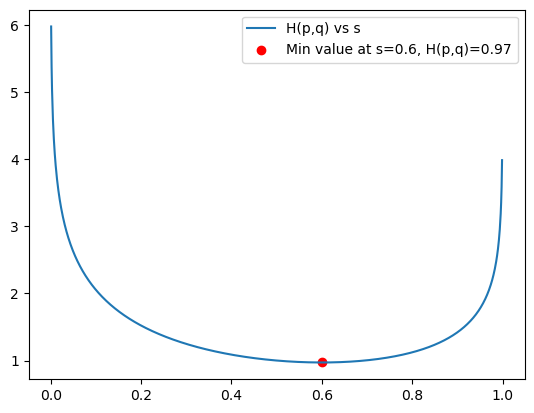

From above Graph we can see that H(p,q) is minimum when s=r
Hence verified


In [235]:
#fixed r
r=0.6
#vary s
s=np.arange(0.001,1,0.001);
arr=[];
for i in s:
    x=Bernouli_Cross_Entropy(r,i)
    arr.append(x)
min_index = np.argmin(arr)
min_x=s[min_index]
min_y=arr[min_index]
plt.plot(s,arr,label='H(p,q) vs s');
plt.scatter(min_x,min_y ,color='red',label=f'Min value at s={min_x}, H(p,q)={min_y:.2f}')
plt.title="H(p,q) vs s"
plt.xlabel="s"
plt.ylabel="H(p,q)"
plt.legend()
plt.show();
print('From above Graph we can see that H(p,q) is minimum when s=r');
print('Hence verified')

(b) Jensen Shannon (JS) Divergence: The definition of JS divergence between two PDFs p and q is
given by: J(p, q) = 0.5 ∗ (D(p||m) + D(q||m)) where m =(p+q)/2 and D(p||q) is the KL divergence between p and q. Write a function that accepts two PDFs (PMFs) p, q and outputs the JS divergence between them. Verify that the JS(p, q) is symmetric indeed while D(p||q) is not. Again,use the normalized histograms of the stereo image pair.

In [237]:
#so now Let use write code for JS Divergence
# as JS(p||q)=(KL(p||m)+KL(q||m))/2 where m=(p+q)/2
def JS_Divergence(p,q):
    # if(len(p)!=len(q)):
    #     raise ValueError("Dimension of both p and q must be equal.")
    m=(p+q)/2;
    return (KL_Divergence(p,m)+KL_Divergence(q,m));

In [247]:
# now taking the image histogram input
right_IP='./right.png'
left_IP='./left.png'

p=normalized_histogram(left_IP);
q=normalized_histogram(right_IP);
#D(p||q)
d1=KL_Divergence(p,q);
#D(q||p)
d2=KL_Divergence(q,p);
print(f'KL(p||q)-KL(q||p)= {d1-d2}')
#JS(p||q)
j1=JS_Divergence(p,q);
#JS(q||p)
j2=JS_Divergence(q,p);
print(f'JS(p||q)-JS(q||p)= {j1-j2}')
print('Hence JS_Div is symmetric while KL_Div is not');

KL(p||q)-KL(q||p)= 0.0006942294040325793
JS(p||q)-JS(q||p)= 0.0
Hence JS_Div is symmetric while KL_Div is not


(c) Wasserstein Distance: The Wasserstein-1 distance between two PDFs r and s is given by: W1(r,s) =
inf   E(x,y)∼π|x − y|. 
π∈Π(r,s)


The set Π(r,s) is composed of all bivariate joint PDFs whose marginals
equal r and s. Given a tuple (p(X,Y),rX,sY) of a joint histogram p(X,Y) and marginals rX,sY,
write a function that accepts this tuple and checks if pX,Y ∈ Π(r,s). Verify your function with a
positive example and a negative example.

In [272]:
# Check_Joint_Marginals function that give that a given pmf satifies the marginals or not
def Check_Joint_Marginals(p,r,s):
    #marginal row
    mar_row=np.sum(p,axis=1)
    #margina column
    mar_col=np.sum(p,axis=0)
    return np.allclose(mar_row,r) and np.allclose(mar_col,s);

In [274]:
# Example positive case (valid joint distribution)

# Joint distribution
p1 = np.array([[0.1, 0.2], [0.3, 0.4]]) 
# Marginal of X
r1 = np.array([0.3, 0.7])  
# Marginal of Y
s1 = np.array([0.4, 0.6]) 



# Example negative case (invalid joint distribution)

# Joint distribution
p2 = np.array([[0.1, 0.2], [0.3, 0.4]])  
# Marginal of X
r2 = np.array([0.4, 0.6])  
# Marginal of Y
s2 = np.array([0.5, 0.5])  

print(Check_Joint_Marginals(p1, r1, s1))  
# Expected: True

print(Check_Joint_Marginals(p2, r2, s2))  
# Expected: False

True
False
